In [1]:
# en este código vamos a hacer un modelo subrogado con una red neuronal
# para el cálculo del coeficiente de refracción de un cristal multicapa según la longitud de onda
# vamos a usar la librería keras

# importamos las librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import interpolate


In [2]:
from funciones import *

In [3]:
# primero vamos a crear un dataset de datos generados artificialmente con nuestro modelo.

def fun(n, d, l):
    r = multicapa(n, d, l)  
    return r[:2]

# Hacemos un generador de n y d aleatorios
def gen():
    n = np.random.uniform(1, 2, 6)
    d = np.random.uniform(0, 200, 6)
    return n, d

# generamos 10000 datos, 800 para entrenar y 200 para test
# siendo las X los n, d y lambda y las y los valores de fun
X = []
y = []

for i in range(1000):
    n, d = gen()
    ll = np.linspace(400, 800, 50)
    for l in ll:
        X.append(list(n) + list(d) + [l])
        y.append(fun(n, d, l))


In [ ]:
import pandas as pd
# guardamos los datos en un dataframe
X = np.array(X)
y = np.array(y)

df = pd.DataFrame()

for i in range(6):
    df['n' + str(i)] = X[:, i]

for i in range(6):
    df['d' + str(i)] = X[:, i + 6]

df['lambda'] = X[:, 12]

df['R1'] = y[:, 0]
df['R2'] = y[:, 1]

#df.to_csv('datos_artificiales.csv', index=False)
# quiero appendar los datos a un archivo csv
df.to_csv('datos_artificiales.csv', mode='a', header=False, index=False)

In [ ]:
import pandas as pd
df2 = pd.read_csv('datos_artificiales.csv')
print(df2.shape)
df2.head()

(700000, 15)


,n0,n1,n2,n3,n4,n5,d0,d1,d2,d3,d4,d5,lambda,R1,R2
0,1.678158,1.709921,1.261909,1.351169,1.719711,1.779426,134.547665,46.062284,167.600252,99.236233,113.849024,167.23906,400.000000,0.048605,0.048605
1,1.678158,1.709921,1.261909,1.351169,1.719711,1.779426,134.547665,46.062284,167.600252,99.236233,113.849024,167.23906,408.163265,0.058695,0.058695
2,1.678158,1.709921,1.261909,1.351169,1.719711,1.779426,134.547665,46.062284,167.600252,99.236233,113.849024,167.23906,416.326531,0.065412,0.065412
3,1.678158,1.709921,1.261909,1.351169,1.719711,1.779426,134.547665,46.062284,167.600252,99.236233,113.849024,167.23906,424.489796,0.068602,0.068602
4,1.678158,1.709921,1.261909,1.351169,1.719711,1.779426,134.547665,46.062284,167.600252,99.236233,113.849024,167.23906,432.653061,0.068652,0.068652


In [ ]:
# definimos X2 e y2
X2 = df2.drop(['R1', 'R2'], axis=1).values
y2 = df2[['R1', 'R2']].values


In [ ]:
# dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



In [ ]:
import tensorflow as tf

Epoch 1/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0085 - val_loss: 0.0064
Epoch 2/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 3/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 4/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 5/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 11/1000
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 12

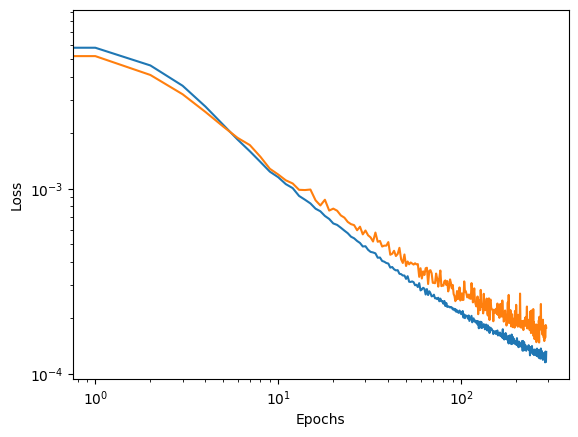

In [ ]:
# vamos a usar un modelo con menos capas y más neuronas

model = Sequential()

model.add(Dense(13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=512, epochs=1000, callbacks=[early_stop])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# guardamos el modelo
model.save('modelo_multicapa_1.keras')

4063/4063 ━━━━━━━━━━━━━━━━━━━━ 2s 583us/step
0.0008838472388674418


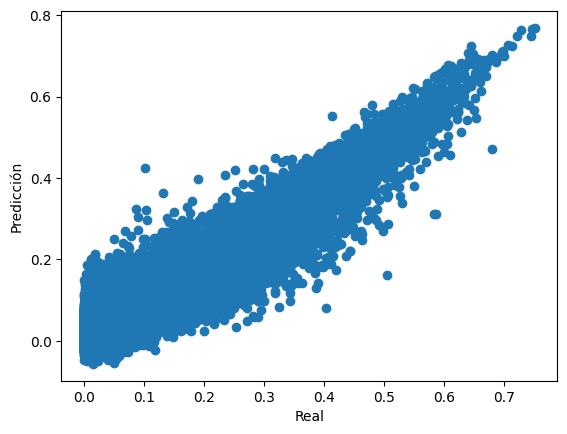

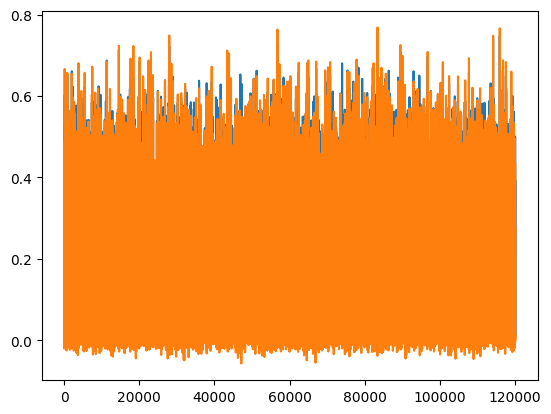

In [ ]:
# hacemos predicciones
predictions = model.predict(X_test)

# comparamos con los valores reales
print(mean_squared_error(y_test, predictions))

# hacemos una gráfica de los resultados
plt.scatter(y_test[:, 0], predictions[:, 0])
plt.xlabel('Real')
plt.ylabel('Predicción')

plt.show()

plt.plot(y_test[9900:, 0])
plt.plot(predictions[9900:, 0])

plt.show()

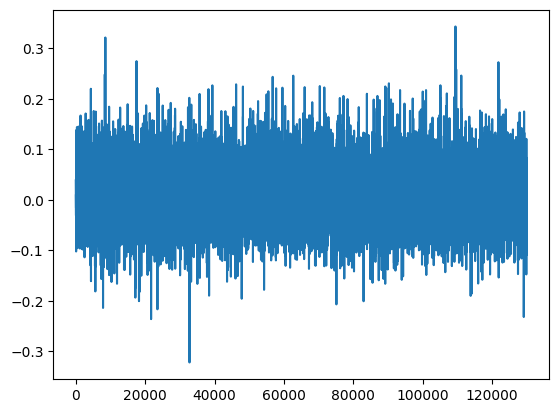

In [ ]:
# graficamos el error
plt.plot(y_test[:, 0] - predictions[:, 0])
plt.show()

In [ ]:
# generamos un n y un d aleatorio y hacemos una predicción
n, d = gen()

ll = np.linspace(400, 800, 100)

y = []
r = []
XX  = np.array([list(n) + list(d) + [l] for l in ll])
XX = scaler.transform(XX)
for l in ll:
    X = np.array(list(n) + list(d) + [l])
    X = scaler.transform([X]);
    r.append(fun(n, d, l))


y = model.predict(XX)
y = np.array(y)
r = np.array(r)
# calculamos el mse de la predicción y el mse del modelo
print(mean_squared_error(r[:, 0], y[:, 0]))
print(mean_squared_error(y_test[:, 0], predictions[:, 0]))


plt.plot(ll, y[:, 0], label='predicción')
plt.plot(ll, r[:, 0], label='real')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.0015075763146094392


ValueError: Found input variables with inconsistent numbers of samples: [140000, 130000]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


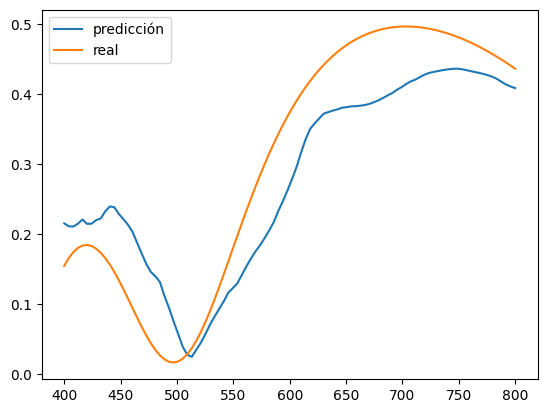

In [ ]:
def predecir(n, d, ll):
    y = []
    r = []
    XX  = np.array([list(n) + list(d) + [l] for l in ll])
    XX = scaler.transform(XX)
    for l in ll:
        X = np.array(list(n) + list(d) + [l])
        X = scaler.transform([X]);
        r.append(fun(n, d, l))


    y = model.predict(XX)
    y = np.array(y)
    r = np.array(r)

    plt.plot(ll, y[:, 0], label='predicción')
    plt.plot(ll, r[:, 0], label='real')
    plt.legend()
    plt.show()


n, d = gen()
predecir(n, d , ll)